# Cluster Validation
Using the Silhouette Metric to score the _goodness_ of a clustering for a given _k_ (number of clusters).  
This can be used to select the best *k* for a dataset. 
  
Use `make_blobs` to create a synthetic dataset with four clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


Text(0.5, 1.0, 'Four Blobs in Three Clusters')

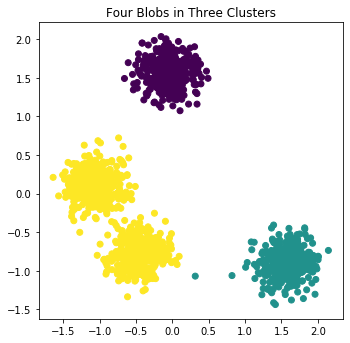

In [2]:
n_samples = 1500
random_state = 21
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers = 4)
X = StandardScaler().fit_transform(X)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Four Blobs in Three Clusters")


In [3]:
sl_dict = {}
for k in range(2,8):
    kmeans_model = KMeans(n_clusters=k, random_state=2).fit(X)
    labels = kmeans_model.labels_
    sl_dict[k] = metrics.silhouette_score(X, labels, metric='euclidean')
    print(k, sl_dict[k])

2 0.584506213402029
3 0.7255426444542957
4 0.7503464402096562
5 0.6524415588492872
6 0.5740151587935385
7 0.45235635074745856


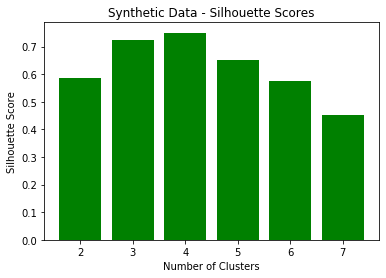

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

k = list(sl_dict.keys())
values = list(sl_dict.values())

plt.bar(range(len(k)),values,tick_label=k, color = 'g')
plt.title('Synthetic Data - Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Iris Dataset
The Silhouette score does not do a good job identifying the number of clusters in the Iris dataset because two of the natural classes are not well separated. So it _suggests_ 2 rather than 3 clusters.

In [5]:
from sklearn import metrics
from sklearn import datasets
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X_scal = StandardScaler().fit_transform(X)

In [7]:
sl_dict = {}
for k in range(2,8):
    kmeans_model = KMeans(n_clusters=k, random_state=2).fit(X_scal)
    labels = kmeans_model.labels_
    sl_dict[k] = metrics.silhouette_score(X_scal, labels, metric='euclidean')
    print(k, sl_dict[k])

2 0.5817500491982808
3 0.45994823920518635
4 0.383850922475103
5 0.34194697093163473
6 0.34414466740456
7 0.3416085198859425


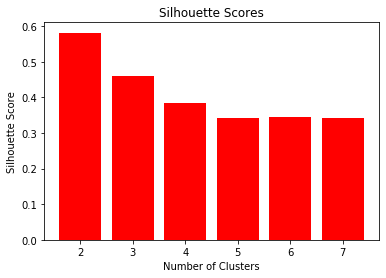

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

k = list(sl_dict.keys())
values = list(sl_dict.values())

plt.bar(range(len(k)),values,tick_label=k, color = 'r')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## The Vehicle Dataset
Image Analysis - classify a vehicle silhouette as one of four types (suv, convertible, minibus, compact).  
The analysis suggests that there are 2 rather than 4 clusters here. 

In [9]:
import pandas as pd
veh_df = pd.read_csv('vehicle.csv')
veh_df.head()

,'COMPACTNESS','CIRCULARITY','DISTANCE_CIRCULARITY','RADIUS_RATIO','PR.AXIS_ASPECT_RATIO','MAX.LENGTH ASPECT_RATIO','SCATTER_RATIO','ELONGATEDNESS','PR_AXIS_RECTANGULARITY','MAX_LENGTH_RECTANGULARITY','SCALED_VARIANCE_MAJOR','SCALED_VARIANCE_MINOR','SCALED_RADIUS_OF_GYRATION','SKEWNESS_ABOUT_MAJOR','SKEWNESS_ABOUT_MINOR','KURTOSIS_ABOUT_MAJOR','KURTOSIS_ABOUT_MINOR','HOLLOWS_RATIO','V.ELONGATEDNESS',TYPE
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,32,suv
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,45,suv
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,32,convertible
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,46,suv
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,45,minibus


In [10]:
veh_df.columns

Index([''COMPACTNESS'', ''CIRCULARITY'', ''DISTANCE_CIRCULARITY'',
       ''RADIUS_RATIO'', ''PR.AXIS_ASPECT_RATIO'', ''MAX.LENGTH ASPECT_RATIO'',
       ''SCATTER_RATIO'', ''ELONGATEDNESS'', ''PR_AXIS_RECTANGULARITY'',
       ''MAX_LENGTH_RECTANGULARITY'', ''SCALED_VARIANCE_MAJOR'',
       ''SCALED_VARIANCE_MINOR'', ''SCALED_RADIUS_OF_GYRATION'',
       ''SKEWNESS_ABOUT_MAJOR'', ''SKEWNESS_ABOUT_MINOR'',
       ''KURTOSIS_ABOUT_MAJOR'', ''KURTOSIS_ABOUT_MINOR'', ''HOLLOWS_RATIO'',
       ''V.ELONGATEDNESS'', 'TYPE'],
      dtype='object')

In [11]:
y = veh_df.pop('TYPE').values
X = veh_df.values
X_scal = StandardScaler().fit_transform(X)
X_scal.shape

(846, 19)

In [12]:
sl_dict = {}
for k in range(2,11):
    kmeans_model = KMeans(n_clusters=k, random_state=2).fit(X_scal)
    labels = kmeans_model.labels_
    sl_dict[k] = metrics.silhouette_score(X_scal, labels, metric='euclidean')
    print(k, sl_dict[k])

2 0.3969691757429641
3 0.28921281080574573
4 0.3019242180253676
5 0.24636808245857564
6 0.22550177355300863
7 0.22190752741530456
8 0.21805455868768858
9 0.20405016996393058
10 0.2037384462911006


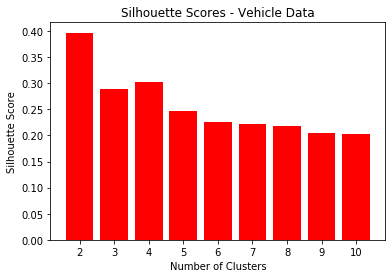

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

k = list(sl_dict.keys())
values = list(sl_dict.values())

plt.bar(range(len(k)),values,tick_label=k, color = 'r')
plt.title('Silhouette Scores - Vehicle Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()